In [1]:
import keras
import tensorflow as tf
from keras import optimizers
from keras.models import Model
from keras.layers import Input, Flatten, Dropout, Dense
from keras.applications import MobileNet
from keras.applications.xception import Xception
from keras.applications.resnet_v2 import ResNet50V2
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
input_tensor=Input(shape=(300,300,3))
######################################################################################################
base_model1 = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)
features1 = base_model1.output
######################################################################################################
base_model2 = ResNet50V2(weights='imagenet', include_top=False, input_tensor=input_tensor)
features2 = base_model2.output
concatenated=keras.layers.concatenate([features1,features2]) #Concatenate the extracted features
####################################################################################################
conv=keras.layers.Conv2D(1024, (1, 1),padding='same')(concatenated) #add the concatenated features to a convolutional layer
feature = Flatten(name='flatten')(conv)
dp = Dropout(0.5)(feature) #add dropout
preds = Dense(3, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.001))(dp) 
Concatenated_model = Model(input=input_tensor, output=preds)
#######################################################

Concatenated_model.compile(optimizer=optimizers.nadam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])


94674944/94668760 [==============================] - 7s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [3]:
Concatenated_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 152, 152, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

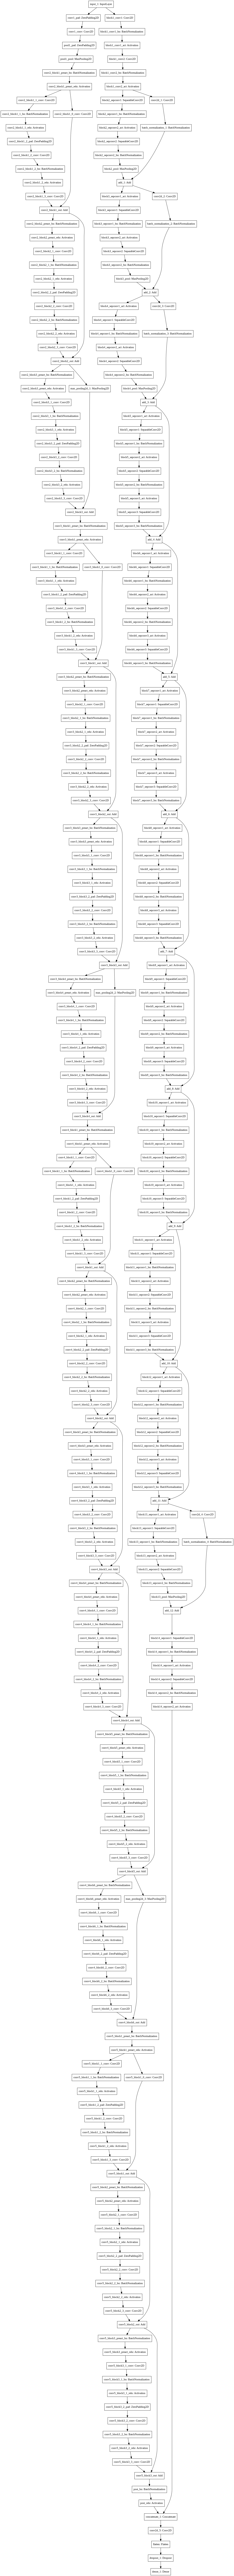

In [4]:
tf.keras.utils.plot_model(Concatenated_model, 'Wazir_first_model.png')